In [4]:
import numpy as np
import matplotlib.pyplot as plt
x_data = [ 338., 333., 328., 207., 226., 25., 179., 60., 208., 606. ] #float 类型
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591. ]
#y_data = bias + w * x_data

In [5]:
#以下为轮询的方法求出最佳b and w  但这里只是用来构建登高线图
x = np.arange(-200, -100, 1) #bias
y = np.arange(-5, 5, 0.1) #weight
Z = np.zeros( ( len(x), len(y) ) )
#X,Y = np.meshgrid( x, y )      #X为x做行向量 len(x)行   Y为y做列向量 len(y)列
for i in range(len(x)) :
    for j in range(len(y)) :
        b = x[i]
        w = y[j]
        Z[j][i] = 0     #x坐标不变 ，对y进行迭代  1列1列的写数据
        for n in range(len(x_data)) :
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2  #算出在这组b和w下的loss
        Z[j][i] /= len(x_data)    #求平均值

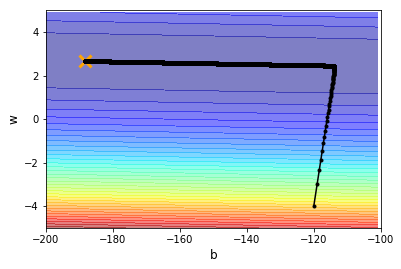

In [6]:
#Gradient descent 
b = -120 #inital b
w = -4  #inital w
lr = 1#learning rate
iteration = 100000  #迭代100000次

#store inital value for plotting
b_history = [b]
w_history = [w]

#w and b 客制化的learning rate
lr_b = 0
lr_w = 0

#iteration 
for i in range(iteration) :
    b_grad = 0    #b and w 的偏微分
    w_grad = 0
    for n in range( len(x_data) ) :
        #loss function 对b and w 求偏导
        b_grad = b_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * 1.0
        w_grad = w_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * x_data[n]
     
    
    lr_b += b_grad ** 2
    lr_w += w_grad ** 2
    
    #updata parameters   
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    #store parameters for plotting 
    b_history.append(b)
    w_history.append(w)
    
#plot figure
#ms markersize size of the marker in points   
#markeredgewidth line width around the marker symbol
plt.contourf( x, y, Z, 50, alpha = 0.5, cmap = plt.get_cmap('jet') ) #cmap = colormap
plt.plot([-188.4],[2.67],'x', ms = 12, markeredgewidth = 3, color = 'orange')
plt.plot(b_history, w_history, 'o-', ms = 3, lw = 1.5, color = 'black')
plt.xlim(-200, -100)    #设置x坐标值范围
plt.ylim(-5, 5)         #设置y坐标值范围
plt.xlabel('b', fontsize = 12)
plt.ylabel('w', fontsize = 12)
plt.show()